In [2]:
from IPython.display import Image

# 2.2

In [4]:
Image(url='https://sun9-11.userapi.com/JoDpoZ6qNlMXtuC72uidTxckLP6AZaMVLgxSeg/hy-t9f4Vj6I.jpg', width=500)

# 2.3 
### a)
Равенство, которое просят проверить, суть формула полной вероятности для $X(t+1)$ при гипотезах $H_1 = \{X_t = k\}$, $H_2 = \{X_t = k-1\}$, $H_3 = \{X_t = k+1\}$. 

$p_k(t),\ p_{k-1}(t),\ p_{k+1}(t)$ - гипотезы, а их множители - условные вероятности, соответствующие указанным в определении $p_{i,k}$

### b)

In [6]:
Image(url='https://sun9-12.userapi.com/ddpzRUoMglY_xlDpZipZOvYz3gXAOkqKj25MKQ/Mh2a955gJZY.jpg', width=500)

### c)

In [9]:
Image(url='https://sun9-65.userapi.com/ziYHIYapHLgykDxmzrFIrcx6HxfqYf4Ntwsq5Q/9-dKXx5RebM.jpg', width=500)

### d)

In [10]:
Image(url='https://sun9-53.userapi.com/LMr1xgGU8-cBmNZhXQr0K1wIcUC-QuCZJGmlkg/3_PtkCYp4dM.jpg', width=500)

In [37]:
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

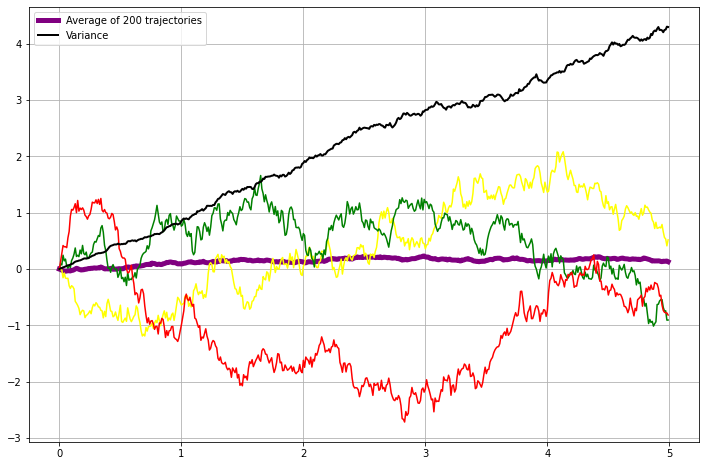

In [51]:
# Wiener proccess
plt.rcParams['figure.figsize'] = [12, 8]
t0 = 0
T = 5

N = 500
ntraj = 200

deltaT = (T - t0) / 500

trajectories = np.zeros((ntraj, N))

for i in range(ntraj):
    for j in range(1, N):
        trajectories[i][j] = trajectories[i, j-1] + norm.rvs() * np.sqrt(deltaT)

average = [0] * N
for j in range(1, N):
    for i in range(ntraj):
        average[j] += trajectories[i][j]
    average[j] /= ntraj 
    
time = np.arange(0, T, deltaT)

variance = [0] * N
for j in range(1, N):
    tmp = []
    for i in range(ntraj):
        tmp.append(trajectories[i][j])
    mu = sum(tmp) / ntraj
    variance[j] = sum((x - mu)**2 for x in tmp) / (ntraj - 1) 


chart = sns.lineplot(x=time, y=average, color='purple', linewidth=5, label='Average of 200 trajectories')

sns.lineplot(x=time, y=trajectories[0], ax=chart, color='yellow')
sns.lineplot(x=time, y=trajectories[1], ax=chart, color='green')
sns.lineplot(x=time, y=trajectories[2], ax=chart, color='red')

sns.lineplot(x=time, y=variance, ax=chart, color='black', linewidth=2, label='Variance')

chart.xaxis.grid()
chart.yaxis.grid()

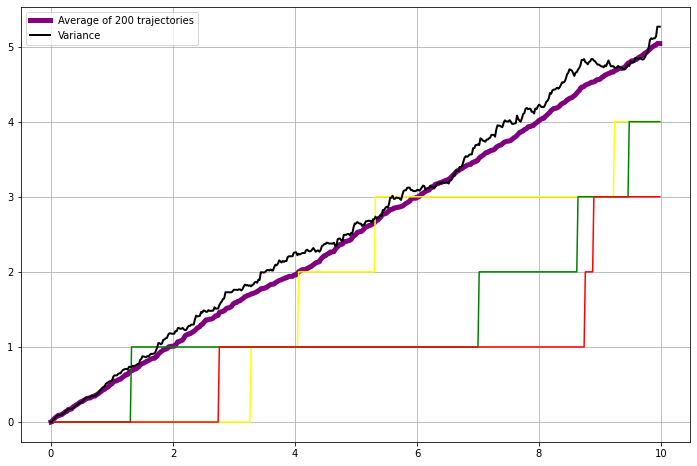

In [56]:
# Poisson proccess
from scipy.stats import poisson

plt.rcParams['figure.figsize'] = [12, 8]
t0 = 0
T = 10

par_lambda = 0.5

N = 500
ntraj = 200

deltaT = (T - t0) / 500

trajectories = np.zeros((ntraj, N))

for i in range(ntraj):
    for j in range(1, N):
        trajectories[i][j] = trajectories[i, j-1] + poisson.rvs(deltaT * par_lambda)
    
average = [0] * N
for j in range(1, N):
    for i in range(ntraj):
        average[j] += trajectories[i][j]
    average[j] /= ntraj 
    
time = np.arange(0, T, deltaT)

variance = [0] * N
for j in range(1, N):
    tmp = []
    for i in range(ntraj):
        tmp.append(trajectories[i][j])
    mu = sum(tmp) / ntraj
    variance[j] = sum((x - mu)**2 for x in tmp) / (ntraj - 1) 


chart = sns.lineplot(x=time, y=average, color='purple', linewidth=5, label='Average of 200 trajectories')

sns.lineplot(x=time, y=trajectories[0], ax=chart, color='yellow')
sns.lineplot(x=time, y=trajectories[1], ax=chart, color='green')
sns.lineplot(x=time, y=trajectories[2], ax=chart, color='red')

sns.lineplot(x=time, y=variance, ax=chart, color='black', linewidth=2, label='Variance')

chart.xaxis.grid()
chart.yaxis.grid()